In [1]:
import matplotlib.pyplot as plt
from zoology.analysis.utils import fetch_wandb_runs

In [2]:
df = fetch_wandb_runs("geometric-meta-learning/zoology", {"tags": {"$in": ["ttt_nstep"]}})

In [5]:
by_width = df.groupby(["model.sequence_mixer.kwargs.configs.1.kwargs.n_steps", "model.d_model"])["valid/accuracy"].max()

model.sequence_mixer.kwargs.configs.1.kwargs.n_steps  model.d_model
1                                                     64               0.630281
                                                      128              0.893811
                                                      256              0.991514
                                                      512              0.999927
2                                                     64               0.640271
                                                      128              0.898134
                                                      256              0.991187
                                                      512              0.999923
3                                                     64               0.646504
                                                      128              0.897604
                                                      256              0.993143
                                                    

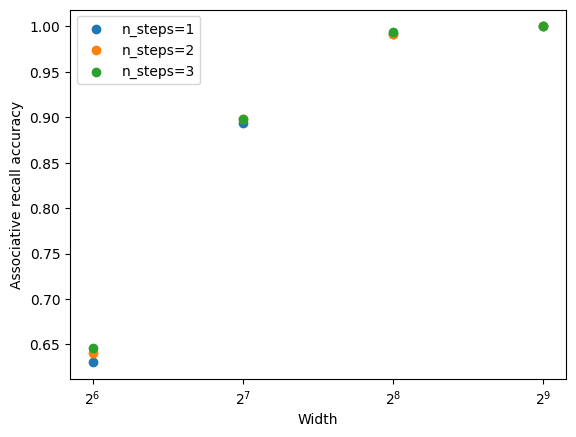

In [7]:
# plot the above as a scatter plot with state_size on x axis and accuracy on y axis
fig, ax = plt.subplots()
for n_steps in by_width.index.levels[0]:
    ax.scatter(by_width[n_steps].index, by_width[n_steps].values, label=f"n_steps={n_steps}")
# log scale base 2 x axis
ax.set_xscale("log", base=2)
# set title
ax.set_xlabel("Width")
ax.set_ylabel("Associative recall accuracy")
plt.legend()